In [ ]:
#Multi-Horizon Food Price Forecasting in Bangladesh Using SARIMAX and Structural Signals


pip install selenium webdriver-manager

In [689]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import time

options = Options()
options.add_argument("--headless")

driver = webdriver.Chrome(
    service=Service(ChromeDriverManager().install()),
    options=options
)

driver.get("https://tcb.gov.bd/site/view/daily_rmp/Prices-of-") #https://tcb.gov.bd/pages/daily-rmps
time.sleep(5)

excel_links = set()
previous_count = 0
round_num = 1
MAX_ROUNDS = 100  # safety cap

while round_num <= MAX_ROUNDS:
    print(f"Scraping round {round_num}")

    elements = driver.find_elements(By.XPATH, "//a[contains(@href,'.xlsx')]")
    for el in elements:
        href = el.get_attribute("href")
        if href:
            if href.startswith("//"):
                href = "https:" + href
            excel_links.add(href)

    current_count = len(excel_links)
    print(f"  Total collected so far: {current_count}")

    # STOP CONDITION: no new files added
    if current_count == previous_count:
        print("No new Excel files detected — stopping.")
        break

    previous_count = current_count

    try:
        next_button = driver.find_element(By.XPATH, "//a[contains(text(),'Next')]")
        next_button.click()
        time.sleep(3)
    except Exception:
        print("Next button not clickable — stopping.")
        break

    round_num += 1

driver.quit()

print("FINAL Excel files collected:", len(excel_links))


Scraping round 1
  Total collected so far: 0
No new Excel files detected — stopping.
FINAL Excel files collected: 0


In [11]:
import os
import time
import requests

SAVE_DIR = '/Users/sazid/Documents/Daily Comm Predection Project/TCB data'
os.makedirs(SAVE_DIR, exist_ok=True)

failed = []

for i, url in enumerate(sorted(excel_links), start=1):
    filename = url.split("/")[-1]
    path = os.path.join(SAVE_DIR, filename)

    if os.path.exists(path):
        continue  # skip if already downloaded

    try:
        r = requests.get(url, timeout=30)
        r.raise_for_status()

        with open(path, "wb") as f:
            f.write(r.content)

        print(f"[{i}] Downloaded:", filename)
        time.sleep(0.4)  # polite delay

    except Exception as e:
        print("FAILED:", filename, e)
        failed.append(url)

print("\nDownload finished.")
print("Failed files:", len(failed))


[1] Downloaded: 2023-12-31-08-18-c9c9f1bb37cc5f28318e3ab83b6ca018.xlsx
[2] Downloaded: 2025-05-17-09-37-71e90273c6c24dc5c94d855fcd96ce66.xlsx
[3] Downloaded: 2025-12-21-09-40-b1a029663492df52816d837b3711c22b.xlsx
[4] Downloaded: 2024-11-20-09-08-079b5ab6e6164dc80707fc0069d5de6f.xlsx
[5] Downloaded: 2021-12-24-10-12-94bc2f5f08e6023b9030cdf9039bc383.xlsx
[6] Downloaded: 2025-09-21-09-37-52b1821a4481fdd674cbb607f36332ed.xlsx
[7] Downloaded: 2024-09-12-09-41-83875764dca3ec4c4056d46b547c13ac.xlsx
[8] Downloaded: 2023-02-23-06-43-529be9d180904dd1e4c920f63e3aa9f9.xlsx
[9] Downloaded: 2025-05-03-09-50-831119d26ed24c56c7b269f67e8f915d.xlsx
[10] Downloaded: 2024-06-26-07-08-4c33d1ee4ca022d61bd867df36d6dbe6.xlsx
[11] Downloaded: 2023-01-25-07-31-a62251130390d90d487a09c5cdcc54f4.xlsx
[12] Downloaded: 2025-01-16-09-55-902b068a75e073fcef155074e07d6af4.xlsx
[13] Downloaded: 2022-03-10-06-58-b143aeed5cbcaab892a813235205d796.xlsx
[14] Downloaded: 2025-11-11-09-44-f89094d995b36152c290ac32244d4adf.xlsx
[

In [12]:
import pandas as pd

In [561]:
data = pd.read_excel('/Users/sazid/Documents/Daily Comm Predection Project/TCB data/2024-01-03-07-10-695ff264aa73cd2533a48fadb4f4dd80.xlsx')

In [562]:
with pd.option_context('display.max_rows',None):
   
 display(data)

,,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,ট্রেডিং কর্পোরেশন অব বাংলাদেশ,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,NaN,NaN,NaN,NaN,www.tcb.gov.bd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,NaN,NaN,NaN,NaN,ঢাকা মহানগরীর নিত্য প্রয়োজনীয় দ্রব্যের খুচরা ব...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,"বুধবার ০৩ জানুয়ারী ২০২৪ খ্রিঃ, ১৯ পৌষ ১৪৩০ বাং...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,স্মারক নং-২৬.০৫.০০০০.০১৭.৩১.০০১.২৪-০০৩,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,তারিখঃ,2024-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN
5,পণ্যের নাম,মাপের একক,অদ্যকার মূল্য(টাকায়),NaN,১সপ্তাহ পূর্বের মূল্য(টাকায়),NaN,১ মাস পূর্বের মূল্য(টাকায়),NaN,মাসিক মূল্যের,১বছর পূর্বের মূল্য(টাকায়),NaN,বাৎসরিক মূল্যের,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,2024-01-03 00:00:00,NaN,2023-12-27 00:00:00,NaN,2023-12-03 00:00:00,NaN,হ্রাস/বৃদ্ধি(%),2023-01-03 00:00:00,NaN,হ্রাস/বৃদ্ধি(%),NaN,NaN,NaN,NaN,NaN
7,চাল,NaN,সর্বনিম্ন,সর্ব্বোচ্চ,সর্বনিম্ন,সর্ব্বোচ্চ,সর্বনিম্ন,সর্ব্বোচ্চ,(+)/(-),সর্বনিম্ন,সর্ব্বোচ্চ,(+)/(-),NaN,NaN,NaN,NaN,NaN
8,চাল সরু (নাজির/মিনিকেট),প্রতি কেজি,60,75,60,70,62,75,-1.459854,58,75,1.503759,NaN,NaN,NaN,NaN,NaN
9,চাল (মাঝারী)পাইজাম/লতা,প্রতি কেজি,50,55,50,55,55,58,-7.079646,52,60,-6.25,NaN,NaN,NaN,NaN,NaN


In [564]:
#after downloading all csv's to the folder, now loading them and making 1 final csv from raw data
import os
folder_path= '/Users/sazid/Documents/Daily Comm Predection Project/TCB data'
data=[]
count = 0
for file in os.listdir(folder_path):
    count+=1

    if not file.lower().endswith(".xlsx"):
        continue

    if file.startswith("~$"):
        continue
        
    path = os.path.join(folder_path,file)


    possible_sheet = [
        'Daily Report', 'Daily retail price', 'Sheet1'
    ]

    xls = pd.ExcelFile(path)
    sheet = next(
    (s for s in possible_sheet if s in xls.sheet_names),
    None
     )
    
    try:
       read = pd.read_excel(path, sheet_name=sheet)
       read=read.iloc[6:58,[0,2,3]]
       read["Price"]=(pd.to_numeric(read.iloc[:,2], errors="coerce")+pd.to_numeric(read.iloc[:,1], errors='coerce'))/2
       read["Date"]=file[0:10] 
        
       data.append(read)
        


    except Exception as e:
        print('Error', file[0:10],(read.iloc[:,2]+read.iloc[:,1])/2)


data = pd.concat(data, ignore_index=True)

data["Products"]=data[" "].combine_first(data["Unnamed: 0"])
data=data[["Products", "Price","Date"]]
data.columns = ["Products","Price","Date"]
data["Date"]=pd.to_datetime(data["Date"])


product_list = [
    "চাল সরু (নাজির/মিনিকেট)","আটা সাদা (খোলা)","ময়দা (খোলা)","সয়াবিন তেল (লুজ)","পাম অয়েল (লুজ)","মশুর ডাল (মাঝারী দানা)","ছোলা (মানভেদে)","আলু (মানভেদে)",
                                    "পিঁয়াজ (দেশী)","রুই","গরু","মুরগী(ব্রয়লার)","মুরগী (দেশী)","পিঁয়াজ (নতুন) (দেশী)","পিঁয়াজ (নতুন/পুরাতন) (দেশী)","আলু (নতুন, মানভেদে)",
    "আলু (নতুন/পুরাতন)(মানভেদে)"
]

data = data[data['Products'].isin(product_list)]
data = data.reset_index()
data.to_csv('/Users/sazid/Documents/Daily Comm Predection Project/TCB data/commodity_data.csv', index=False) 

In [374]:
চাল সরু (নাজির/মিনিকেট), আটা সাদা (খোলা), সয়াবিন তেল (লুজ), ছোলা (মানভেদে), আলু (মানভেদে)//আলু (নতুন/পুরাতন)(মানভেদে)//আলু (নতুন, মানভেদে), পিঁয়াজ (দেশী)//পিঁয়াজ (নতুন) (দেশী)//পিঁয়াজ (নতুন/পুরাতন) (দেশী), মুরগী(ব্রয়লার)

In [1158]:
#slicing for product = 'চাল সরু (নাজির/মিনিকেট)' for Time Series Decom

import pandas as pd
data4= pd.read_csv('/Users/sazid/Documents/Daily Comm Predection Project/TCB data/commodity_data.csv')
data_rice = ( data4.
             
             query("Products=='মুরগী(ব্রয়লার)' ").
             assign(Date=pd.to_datetime(data4['Date'])).
             set_index(['Date'])[['Price']].
             resample('W')
             .mean()
             
            )

data_rice['Price']=data_rice['Price'].interpolate()

#extends = ({
#    'Date' : ['2025-12-14','2025-12-21'],
#    'Price' : [130,70]
#})

#extend = pd.DataFrame(extends)
#extend['Date'] = pd.to_datetime(extend['Date'])
#extend = extend.set_index('Date')
#data_rice = pd.concat([data_rice,extend])


with pd.option_context('display.max_rows', None):
  display(data_rice)

,Price
Date,
2021-05-23,140.000000
2021-05-30,125.833333
2021-06-06,128.125000
2021-06-13,132.500000
2021-06-20,136.250000
2021-06-27,139.500000
2021-07-04,141.785714
2021-07-11,131.285714
2021-07-18,129.000000


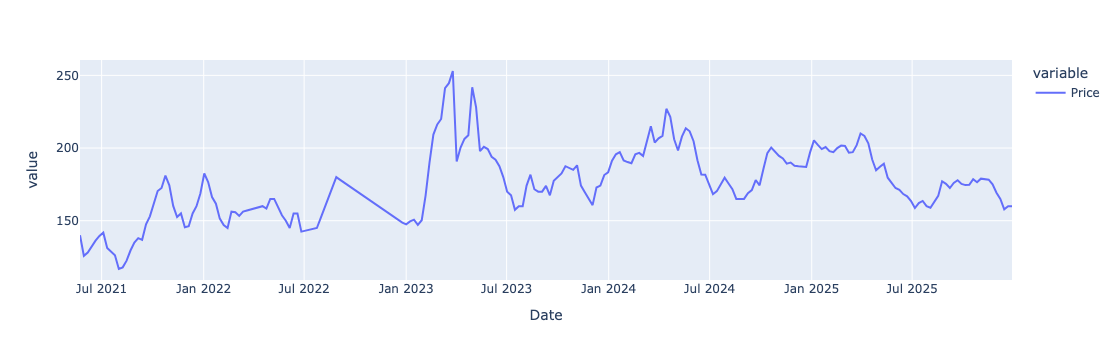

In [1159]:
data_rice.plot()

ADF statistic: -2.560626143687189
p-value: 0.10141111986725215


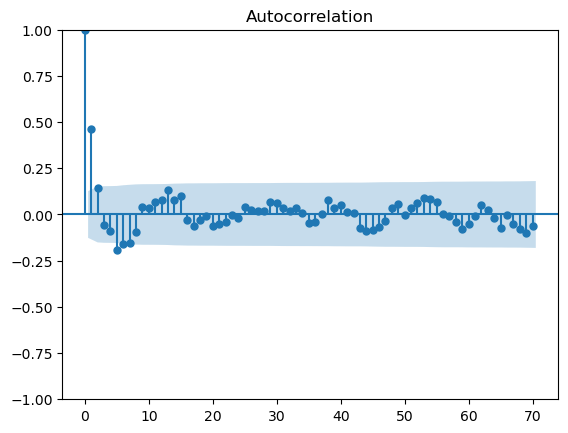

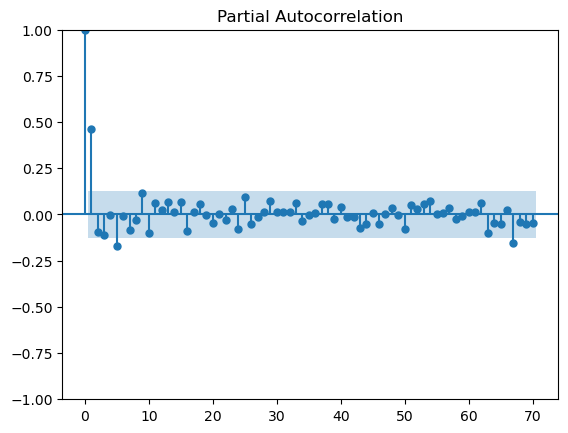

In [1101]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig_acf=plot_acf(data_rice.diff().dropna(), lags=70);
fig_pacf=plot_pacf(data_rice.diff().dropna(), lags=70);

#with open('/Users/sazid/Documents/Daily Comm Predection Project/Fitted Model/ACF/পিঁয়াজ (দেশী).pkl', 'wb') as g:
 #   pickle.dump(fig_acf,g)

#with open('/Users/sazid/Documents/Daily Comm Predection Project/Fitted Model/PACF/পিঁয়াজ (দেশী).pkl','wb') as h:
 #   pickle.dump(fig_pacf,h)




from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(data_rice.dropna())
print("ADF statistic:", adf_result[0])
print("p-value:", adf_result[1])



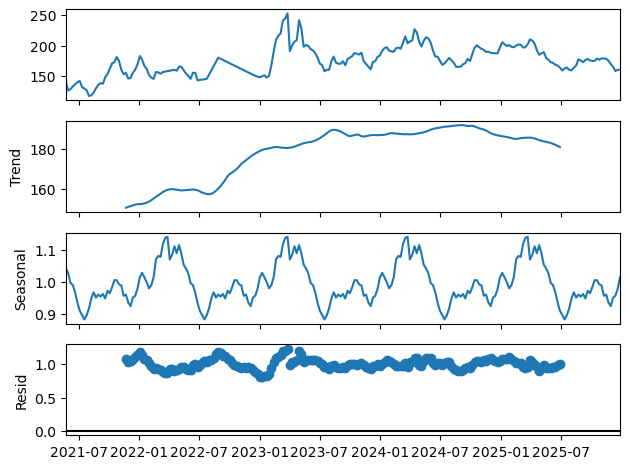

In [1160]:
import statsmodels.api as sm
result = sm.tsa.seasonal_decompose(x=data_rice, model='multiplicative', period=52)
final = pd.DataFrame(
    {
        'trend':result.trend,
        'seasonal':result.seasonal,
        'reside': result.resid
    }
).dropna()
result.plot();

#import pickle
#with open('/Users/sazid/Documents/Daily Comm Predection Project/Fitted Model/TSA model/পিঁয়াজ (দেশী).pkl', 'wb') as f:
 #   pickle.dump(result, f)

In [1074]:
result

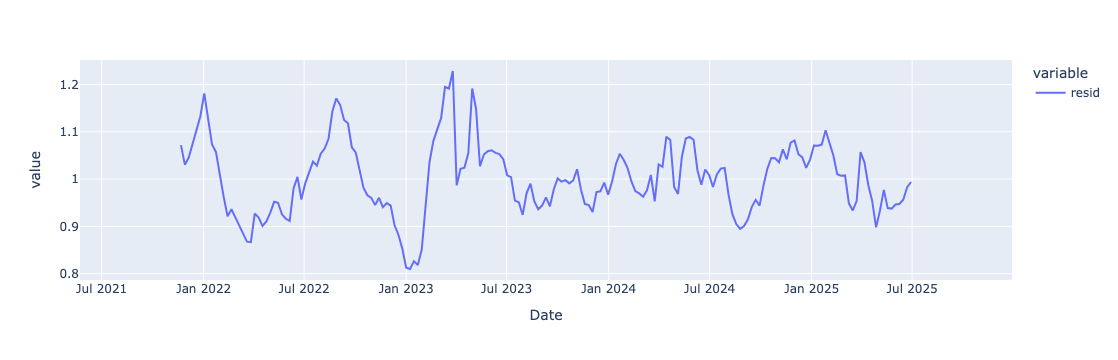

In [241]:
result.resid.plot()

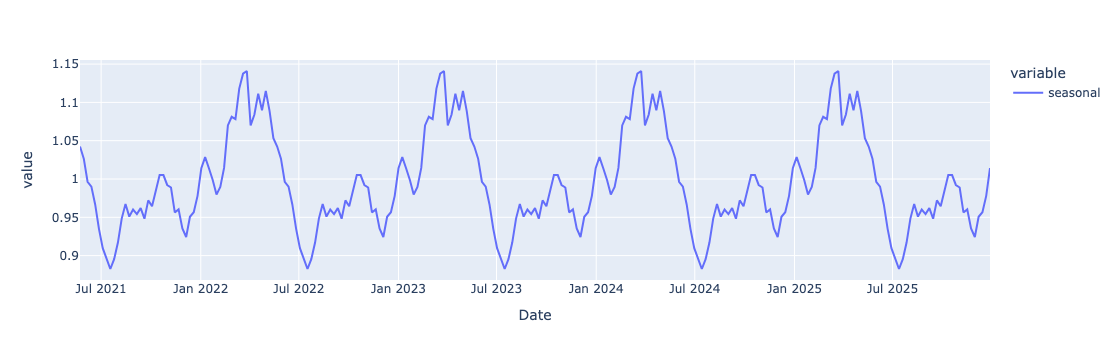

In [242]:
result.seasonal.plot()

In [3]:
pd.options.plotting.backend = 'plotly'

In [10]:
#Using Sarimax

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [1165]:
#model_d0 this is for studying the structure 

def season_flag(month):
    if month in [11,12,1,2]:
        return "Winter"

    if month in [3,4,5]:
        return "Pre-Monsoon"
    if month in [6,7,8,9]:
        return "Monsoon"
    else :
        return "Post-Monsoon"

#flood flag
flood = {
"start_date" : ['2022-05-15','2023-08-01','2024-08-21'],
    "end_date" : ['2022-07-31','2023-08-20','2024-09-30']
    
}
data2 = pd.DataFrame(flood)

data2['start_date']=pd.to_datetime(data2['start_date'])
data2['end_date']=pd.to_datetime(data2['end_date'])



#creating ramadan fag
data1={
"start_date":['2021-04-05','2022-03-25','2023-03-16','2024-03-04','2025-02-25'],
    "end_date":['2021-05-19','2022-05-08','2023-04-28','2024-04-16','2025-04-07']  
    }
data1 = pd.DataFrame(data1
)


data1['start_date']=pd.to_datetime(data1['start_date'])
data1['end_date']=pd.to_datetime(data1['end_date'])




def flood_flag(date):
    return any(
     (date>=row.start_date) and (date<=row.end_date) for _,row in data2.iterrows()  
    )


def ramadan_flag(date):
    return any(
    (date>=row.start_date) and (date<=row.end_date) for _,row in data1.iterrows()
        
    )


data_rice = ( data4.
             
             query("Products=='মুরগী(ব্রয়লার)'").
             assign(Date=pd.to_datetime(data4['Date'])).
             set_index(['Date']).
             resample('W')
             .agg(
             {
                 'Price':'mean',
                         
             }   
             )
            )


data_rice['Price'] = data_rice['Price'].interpolate()
data_rice['flood']=data_rice.index.map(flood_flag).astype(int)
data_rice['Ramadan']=data_rice.index.map(ramadan_flag).astype(int)
data_rice['Season'] = data_rice.index.month.map(season_flag)

#only for onion
extends = ({
    'Date' : ['2025-12-14','2025-12-21','2025-12-28','2026-01-04','2026-01-11','2026-01-18','2026-01-25','2026-02-01','2026-02-08'],
    'Price' : [130,70,100,67.5,65,55,55,55,52.5]
})

extend = pd.DataFrame(extends)
extend['Date'] = pd.to_datetime(extend['Date'])
extend = extend.set_index('Date')
#data_rice = pd.concat([data_rice,extend])



series = data_rice[['Price']]
series.index = pd.to_datetime(series.index)

X = data_rice[['Ramadan','flood']]
X.index = pd.to_datetime(X.index)

season_dummies = pd.get_dummies(
    data_rice['Season']
).astype(int)

season_dummies = season_dummies.drop(columns=['Monsoon'])

X= X.fillna(0)
X = pd.concat([X,season_dummies], axis=1)



model1 = SARIMAX(

    series,
    order=(1,0,0),
    exog=X 
)
model_fit_d0 = model1.fit()


#import pickle
#with open('/Users/sazid/Documents/Daily Comm Predection Project/Fitted Model/D=0/চাল সরু.pkl', 'wb') as f:
 #   pickle.dump(model_fit_d0,f)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.07366D+00    |proj g|=  2.24736D-03

At iterate    5    f=  4.74445D+00    |proj g|=  1.07533D-02

At iterate   10    f=  4.36357D+00    |proj g|=  8.65641D-02

At iterate   15    f=  3.61548D+00    |proj g|=  1.45257D-02

At iterate   20    f=  3.50895D+00    |proj g|=  6.05334D-04

At iterate   25    f=  3.50852D+00    |proj g|=  1.20754D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     45      1     0     0   

 This problem is unconstrained.


In [1166]:
model_fit_d0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  241
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -845.543
Date:                Wed, 25 Feb 2026   AIC                           1705.087
Time:                        16:32:21   BIC                           1729.481
Sample:                    05-23-2021   HQIC                          1714.915
                         - 12-28-2025                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Ramadan         -0.5360      1.977     -0.271      0.786      -4.411       3.339
flood           -0.7333      3.519     -0.208      0.835      -7.630       6.163
Post-Monsoon     4.4750      5.456      0.820      0.412      -6.219      15.169
Pre-Monsoon      3.1727      7.686      0.413      0.680     -11.891      18.236
Winter           2.5354      6.683      0.379      0.704     -10.564      15.634
ar.L1            0.9987      0.003    321.965      0.000       0.993       1.005
sigma2          63.7220      2.432     26.202      0.000      58.955      68.488
===================================================================================
Ljung-Box (L1) (Q):                   3.26   Jarque-Bera (JB):              2682.69
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                            -1.67
Prob(H) (two-sided):                  0.01   Kurtosis:                        19.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1167]:
#creating data for forecasting , d= 0

future_X = pd.DataFrame()
start_date = series.index[-1]+pd.DateOffset(weeks=1)
end_date = start_date + pd.DateOffset(weeks=6*5)
date_range = pd.date_range(start_date,end_date,freq='W')
future_X.index=date_range



#Creating future ramadan flag
future_ramadan = pd.DataFrame(
    {
     'start_date' : ["2026-02-18"],
     'end_date' : ["2026-03-19"]   
    }
)

future_ramadan['start_date']=pd.to_datetime(future_ramadan['start_date'])
future_ramadan['end_date']=pd.to_datetime(future_ramadan['end_date'])

def future_ramadan_(date):
    return any(
        (date>=row.start_date) and (date<=row.end_date) for _,row in future_ramadan.iterrows()
    )
future_X.index = pd.to_datetime(future_X.index)
future_X['Ramadan']=future_X.index.map(future_ramadan_).astype(int)



#creating flood flag
flood = pd.DataFrame(
    {
        'start' : ["2026-05-01"],
        'end' : ["2026-05-20"]
    }
)
flood['start']=pd.to_datetime(flood['start'])
flood['end']=pd.to_datetime(flood['end'])

def future_flood_(date):
    return any(
        (date>=row.start) and (date<=row.end) for _,row in flood.iterrows()
    )

future_X['flood']=future_X.index.map(future_flood_).astype(int)


#creating season flag
def future_season(date):
    if date in [11,12,1,2]:
        return "Winter"

    if date in [3,4,5]:
        return "Pre-Monsoon"
    if date in [6,7,8,9]:
        return "Monsoon"
    else :
        return "Post-Monsoon"

future_X['Season']=future_X.index.month.map(future_season)

dummies = pd.get_dummies(
  future_X['Season'],
       
).astype(int)



future_X = future_X[['Ramadan','flood']]
future_X = pd.concat([future_X,dummies], axis=1)


future_X = future_X.reindex(
    columns = X.columns,
    fill_value = 0
)


#future_X.to_csv('/Users/sazid/Documents/Daily Comm Predection Project/products wise data/Data to Predict/মুরগী(ব্রয়লার)_F.csv', index=True)


In [1140]:
future_X

,Ramadan,flood,Post-Monsoon,Pre-Monsoon,Winter
2025-12-28,0,0,0,0,1
2026-01-04,0,0,0,0,1
2026-01-11,0,0,0,0,1
2026-01-18,0,0,0,0,1
2026-01-25,0,0,0,0,1
2026-02-01,0,0,0,0,1
2026-02-08,0,0,0,0,1
2026-02-15,0,0,0,0,1
2026-02-22,1,0,0,0,1
2026-03-01,1,0,0,1,0


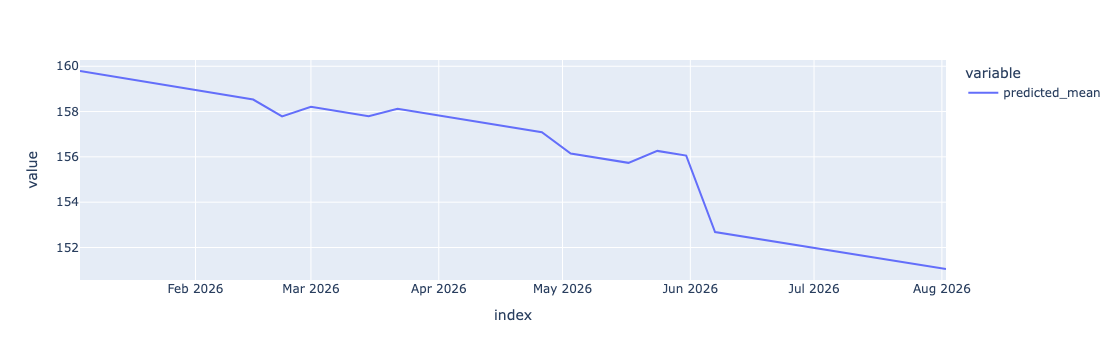

In [1168]:
#forecasting for d =0


forecast = model_fit_d0.get_forecast(
    steps=len(future_X),
    exog = future_X
)


future=forecast.predicted_mean
pd.options.plotting.backend = 'plotly'
future.plot()


#forecast+previous data
final = pd.concat([series,future])
#final.to_csv('/Users/sazid/Documents/Daily Comm Predection Project/products wise data/Products Predicted Data/d=o/onion_refit_P.csv', index=True)
#final.plot()
future.plot()

In [1169]:
#model_weekly_data d1

def season_flag(month):
    if month in [11,12,1,2]:
        return "Winter"

    if month in [3,4,5]:
        return "Pre-Monsoon"
    if month in [6,7,8,9]:
        return "Monsoon"
    else :
        return "Post-Monsoon"

#flood flag
flood = {
"start_date" : ['2022-05-15','2023-08-01','2024-08-21'],
    "end_date" : ['2022-07-31','2023-08-20','2024-09-30']
    
}
data2 = pd.DataFrame(flood)

data2['start_date']=pd.to_datetime(data2['start_date'])
data2['end_date']=pd.to_datetime(data2['end_date'])



#creating ramadan fag
data1={
"start_date":['2021-04-05','2022-03-25','2023-03-16','2024-03-04','2025-02-25'],
    "end_date":['2021-05-19','2022-05-08','2023-04-28','2024-04-16','2025-04-07']  
    }
data1 = pd.DataFrame(data1
)


data1['start_date']=pd.to_datetime(data1['start_date'])
data1['end_date']=pd.to_datetime(data1['end_date'])




def flood_flag(date):
    return any(
     (date>=row.start_date) and (date<=row.end_date) for _,row in data2.iterrows()  
    )


def ramadan_flag(date):
    return any(
    (date>=row.start_date) and (date<=row.end_date) for _,row in data1.iterrows()
        
    )


data_rice = ( data4.
             
             query("Products=='মুরগী(ব্রয়লার)'").
             assign(Date=pd.to_datetime(data4['Date'])).
             set_index(['Date']).
             resample('W')
             .agg(
             {
                 'Price':'mean',
                         
             }   
             )
            )


data_rice['Price'] = data_rice['Price'].interpolate()
data_rice['flood']=data_rice.index.map(flood_flag).astype(int)
data_rice['Ramadan']=data_rice.index.map(ramadan_flag).astype(int)
data_rice['Season'] = data_rice.index.month.map(season_flag)

#only for onion
extends = ({
    'Date' : ['2025-12-14','2025-12-21','2025-12-28','2026-01-04','2026-01-11','2026-01-18','2026-01-25','2026-02-01','2026-02-08'],
    'Price' : [130,70,100,67.5,65,55,55,55,52.5]
})

extend = pd.DataFrame(extends)
extend['Date'] = pd.to_datetime(extend['Date'])
extend = extend.set_index('Date')
#data_rice = pd.concat([data_rice,extend])



series = data_rice[['Price']]
series.index = pd.to_datetime(series.index)

X = data_rice[['Ramadan','flood']]
X.index = pd.to_datetime(X.index)

season_dummies = pd.get_dummies(
    data_rice['Season']
).astype(int)

season_dummies = season_dummies.drop(columns=['Monsoon'])

X= X.fillna(0)
X = pd.concat([X,season_dummies], axis=1)


from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(

    series,
    order=(1,1,0),
    trend='t',
    exog=X
    #simple_differencing=True
)
model_fit_weekly = model.fit()



#import pickle
#with open('/Users/sazid/Documents/Daily Comm Predection Project/Fitted Model/D=1/model_weekly_চাল সরু (নাজির_মিনিকেট).pkl', 'wb') as f:
 # pickle.dump(model_fit_weekly, f)



#data_rice.to_csv('/Users/sazid/Documents/Daily Comm Predection Project/products wise data/Individual Products Actual Data/চাল সরু (নাজির_মিনিকেট)_W.csv', index=True)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.47444D+00    |proj g|=  2.23252D-03

At iterate    5    f=  3.47436D+00    |proj g|=  3.57034D-02

At iterate   10    f=  3.47423D+00    |proj g|=  1.79351D-01

At iterate   15    f=  3.47370D+00    |proj g|=  2.29260D-02

At iterate   20    f=  3.47370D+00    |proj g|=  3.17746D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     20     27      1     0     0   3.177D-04   3.474D+00
  F =   3.4736975846489089     

CONVERG

 This problem is unconstrained.


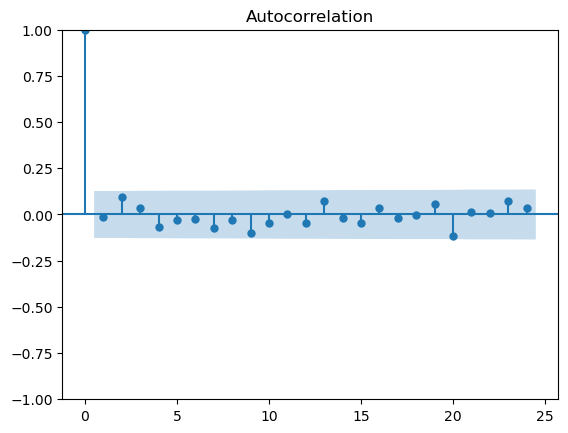

In [1027]:
plot_acf(model_fit_weekly.resid);
#pd.plotting.lag_plot(model_fit_weekly.resid)

In [1170]:
model_fit_weekly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  241
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -837.161
Date:                Wed, 25 Feb 2026   AIC                           1690.322
Time:                        16:33:08   BIC                           1718.167
Sample:                    05-23-2021   HQIC                          1701.542
                         - 12-28-2025                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
drift           -0.0007      0.005     -0.140      0.889      -0.011       0.009
Ramadan         -1.0953      1.862     -0.588      0.556      -4.745       2.554
flood           -0.6050      3.492     -0.173      0.862      -7.449       6.239
Post-Monsoon     3.8267      5.374      0.712      0.476      -6.707      14.360
Pre-Monsoon      2.5341      6.358      0.399      0.690      -9.927      14.995
Winter           3.1786      6.477      0.491      0.624      -9.516      15.873
ar.L1            0.1348      0.041      3.312      0.001       0.055       0.215
sigma2          62.6932      2.145     29.222      0.000      58.488      66.898
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3214.74
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                            -1.87
Prob(H) (two-sided):                  0.01   Kurtosis:                        20.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [639]:
#Forecastig using model :

In [1149]:
future_X = pd.DataFrame()
start_date = series.index[-1]+pd.DateOffset(weeks=1)
end_date = start_date + pd.DateOffset(weeks=6*5)
date_range = pd.date_range(start_date,end_date,freq='W')
future_X.index=date_range



#Creating future ramadan flag
future_ramadan = pd.DataFrame(
    {
     'start_date' : ["2026-02-18"],
     'end_date' : ["2026-03-19"]   
    }
)

future_ramadan['start_date']=pd.to_datetime(future_ramadan['start_date'])
future_ramadan['end_date']=pd.to_datetime(future_ramadan['end_date'])

def future_ramadan_(date):
    return any(
        (date>=row.start_date) and (date<=row.end_date) for _,row in future_ramadan.iterrows()
    )
future_X.index = pd.to_datetime(future_X.index)
future_X['Ramadan']=future_X.index.map(future_ramadan_).astype(int)



#creating flood flag
flood = pd.DataFrame(
    {
        'start' : ["2026-05-01"],
        'end' : ["2026-05-20"]
    }
)
flood['start']=pd.to_datetime(flood['start'])
flood['end']=pd.to_datetime(flood['end'])

def future_flood_(date):
    return any(
        (date>=row.start) and (date<=row.end) for _,row in flood.iterrows()
    )

future_X['flood']=future_X.index.map(future_flood_).astype(int)


#creating season flag
def future_season(date):
    if date in [11,12,1,2]:
        return "Winter"

    if date in [3,4,5]:
        return "Pre-Monsoon"
    if date in [6,7,8,9]:
        return "Monsoon"
    else :
        return "Post-Monsoon"

future_X['Season']=future_X.index.month.map(future_season)

dummies = pd.get_dummies(
  future_X['Season'],
       
).astype(int)



future_X = future_X[['Ramadan','flood']]
future_X = pd.concat([future_X,dummies], axis=1)


future_X = future_X.reindex(
    columns = X.columns,
    fill_value = 0
)


future_X.to_csv('/Users/sazid/Documents/Daily Comm Predection Project/products wise data/Data to Predict/চাল সরু (নাজির_মিনিকেট)_F.csv', index=True)



In [323]:
#understanding what model_fit can do:
model_fit.model.order
model_fit.model.seasonal_order
model_fit.model.exog_names
model_fit.params


#standard error
model_fit.bse
model_fit.tvalues
model_fit.pvalues




model_fit.resid



model_fit.fittedvalues


Date
2021-05-23    -0.624348
2021-05-30    59.500412
2021-06-06    59.513335
2021-06-13    61.921164
2021-06-20    61.501254
                ...    
2025-11-30    78.574006
2025-12-07    77.874839
2025-12-14    77.653464
2025-12-21    77.542933
2025-12-28    77.575260
Freq: W-SUN, Length: 241, dtype: float64

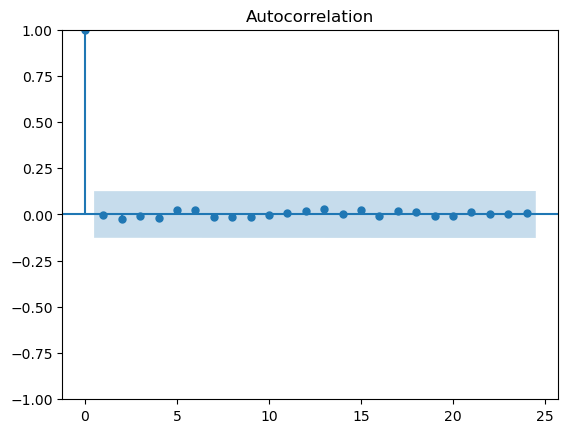

In [681]:
plot_acf(model_fit_weekly.resid);

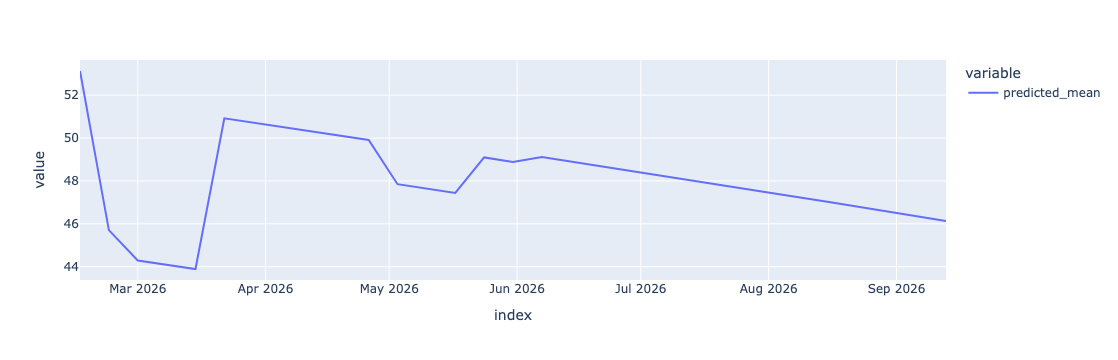

In [1150]:
#forecasting


forecast = model_fit_weekly.get_forecast(
    steps=31,
    exog = future_X
)


future=forecast.predicted_mean
pd.options.plotting.backend = 'plotly'
future.plot()


#forecast+previous data
#final = pd.concat([series,future])
#final.to_csv('/Users/sazid/Documents/Daily Comm Predection Project/products wise data/Products Predicted Data/d=o/মুরগী(ব্রয়লার)_P.csv', index=True)
#final.plot()

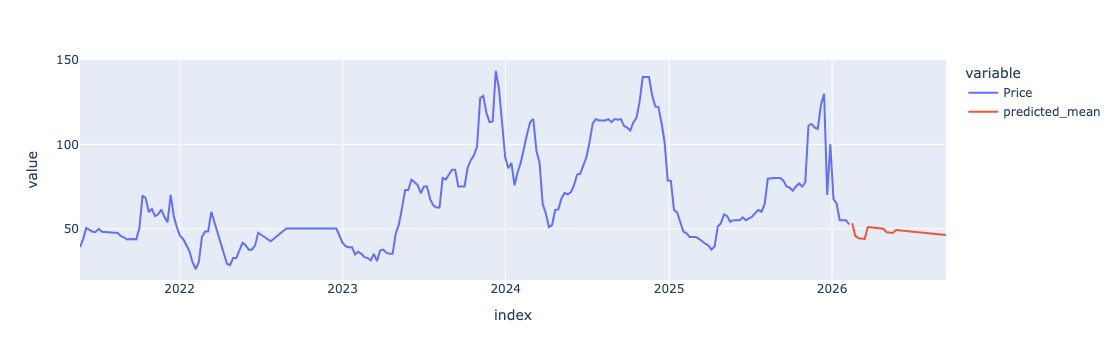

In [1151]:
#forecast+previous data
#final = pd.concat([series,future])
#final.to_csv('/Users/sazid/Documents/Daily Comm Predection Project/products wise data/Products Predicted Data/d=1/onion_P.csv', index=True)
final.plot()

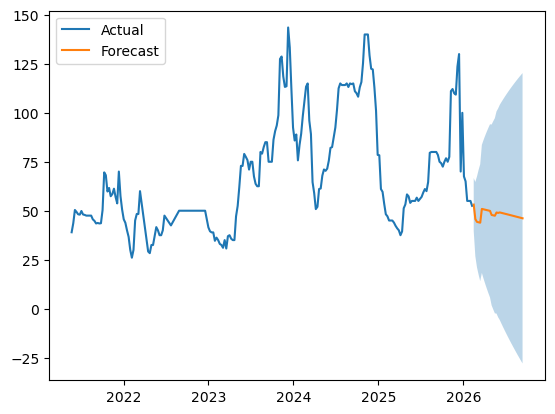

In [1153]:
#forecasting with confidence interval

import matplotlib.pyplot as plt
ci = forecast.conf_int(alpha=0.1) #confidence interval 90%
cii = pd.concat([series,ci])
#cii.to_csv('/Users/sazid/Documents/Daily Comm Predection Project/products wise data/Products Predicted Data/d=1/onion_refit_PI.csv', index=True)


plt.plot(series.index, series, label="Actual")
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label="Forecast")
plt.fill_between(
    ci.index,
    ci['lower Price'],
    ci['upper Price'],
    alpha=0.3
)
plt.legend()


In [472]:

 with open('/Users/sazid/Documents/Daily Comm Predection Project/Fitted Model/model_weekly_চাল সরু.pkl', 'rb') as f:
    model=pickle.load(f)

In [473]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  241
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -269.430
Date:                Mon, 26 Jan 2026   AIC                            554.859
Time:                        20:46:09   BIC                            582.704
Sample:                    05-23-2021   HQIC                           566.079
                         - 12-28-2025                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
drift            0.0003      0.000      0.800      0.423      -0.000       0.001
Ramadan          0.0306      0.676      0.045      0.964      -1.295       1.356
flood            0.2007      0.338      0.593      0.553      -0.462       0.864
Post-Monsoon    -0.3096      0.257     -1.203      0.229      -0.814       0.195
Pre-Monsoon     -0.6248      0.160     -3.897      0.000      -0.939      -0.311
Winter          -0.3132      0.276     -1.133      0.257      -0.855       0.229
ar.L1            0.2241      0.043      5.230      0.000       0.140       0.308
sigma2           0.5541      0.033     16.673      0.000       0.489       0.619
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):               140.06
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.38
Prob(H) (two-sided):                  0.95   Kurtosis:                         6.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1070]:
path = '/Users/sazid/Documents/Daily Comm Predection Project/Fitted Model/D=1'
pathh = '/Users/sazid/Documents/Daily Comm Predection Project/Fitted Model/D=0'

for i in os.listdir(path):
    if i.endswith(".pkl"):
         path1 = os.path.join(path,i)
         with open(path1, 'rb') as f:
           model=pickle.load(f)
           print('Model Name: ',i, model.summary())
for j in os.listdir(pathh):
    if j.endswith(".pkl"):
        path2=os.path.join(pathh,j)
        with open(path2, 'rb') as f:
            model=pickle.load(f)
            print('Model Name', j, model.summary())

Model Name:  model_weekly_আলু (মানভেদে).pkl                                SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  238
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -538.436
Date:                Mon, 09 Feb 2026   AIC                           1094.873
Time:                        12:44:21   BIC                           1126.085
Sample:                    05-23-2021   HQIC                          1107.454
                         - 12-07-2025                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
drift        -7.325e-05      0.001     -0.090      0.929      -0.002       0.002
Ramadan         -0.9551      0.959     -0.995      0.320      -2.836       0.925


In [ ]:
#NOW checking for mae,rmse,mae etc

In [919]:
accuracy = []

In [1060]:
data = pd.read_csv('/Users/sazid/Documents/Daily Comm Predection Project/products wise data/Individual Products Actual Data/আলু (মানভেদে)_W.csv')


train1 = data[data['Date']<'2025-07-01']
train = train1.loc[: , train1.columns[[0,1]]]
train['Date']= pd.to_datetime(train['Date'])
train = train.set_index('Date')
train['price'] = pd.to_numeric(train['Price'])
train = train['Price']

X = train1.loc[:, train1.columns[[0,2,3,4]]]
X['Date']= pd.to_datetime(X['Date'])
X = X.set_index('Date')
dummies = pd.get_dummies(
    X['Season']
).astype(int)
dummies = dummies.drop(columns='Monsoon')
X=X[['flood','Ramadan']]
X = pd.concat([X,dummies], axis=1)



test = data[data['Date']>'2025-07-01']
X_test = test.loc[:, test.columns[[0,2,3,4]]]
X_test['Date']=pd.to_datetime(X_test['Date'])
X_test = X_test.set_index('Date')
dummies = pd.get_dummies(
    X_test['Season']
).astype(int)
X_test = X_test[['flood','Ramadan']]
X_test = pd.concat([X_test,dummies], axis=1)

test_price = test.loc[:, test.columns[[0,1]]]
test_price['Date']= pd.to_datetime(test_price['Date'])
test_price = test_price.set_index('Date')



from statsmodels.tsa.statespace.sarimax import SARIMAX

model_d0 = SARIMAX(
    train,
    order=(2,0,3),
    exog = X,
)
model_d0_fit = model_d0.fit()


forecast= model_d0_fit.get_forecast(
    steps = 23,
    exog = X_test
)

pred = forecast.predicted_mean

evall = pd.concat([test_price,pred], axis=1)
evall.columns = ['Actual','Predicted']

model_d0_fit.summary()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.51854D+00    |proj g|=  1.68385D-02

At iterate    5    f=  3.45624D+00    |proj g|=  1.49507D-01

At iterate   10    f=  3.11397D+00    |proj g|=  1.86019D-01

At iterate   15    f=  3.01795D+00    |proj g|=  8.87270D-02

At iterate   20    f=  2.56717D+00    |proj g|=  1.22715D-01

At iterate   25    f=  2.36562D+00    |proj g|=  4.01316D-02

At iterate   30    f=  2.32442D+00    |proj g|=  2.89827D-02

At iterate   35    f=  2.32331D+00    |proj g|=  3.70198D-04

At iterate   40    f=  2.32306D+00    |proj g|=  5.81399D-03

At iterate   45    f=  2.32251D+00    |proj g|=  2.91718D-03

At iterate   50    f=  2.32051D+00    |proj g|=  2.36908D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  215
Model:               SARIMAX(2, 0, 3)   Log Likelihood                -498.911
Date:                Mon, 09 Feb 2026   AIC                           1019.821
Time:                        12:35:48   BIC                           1056.898
Sample:                    05-23-2021   HQIC                          1034.802
                         - 06-29-2025                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
flood           -0.1441      1.567     -0.092      0.927      -3.216       2.928
Ramadan         -1.1226      1.044     -1.076      0.282      -3.168       0.923
Post-Monsoon    -0.4241      1.714     -0.247      0.805      -3.784       2.936
Pre-Monsoon     -0.2996      1.645     -0.182      0.855      -3.523       2.924
Winter          -0.1733      1.895     -0.091      0.927      -3.888       3.541
ar.L1        -2.323e-05      0.080     -0.000      1.000      -0.156       0.156
ar.L2            0.9849      0.081     12.136      0.000       0.826       1.144
ma.L1            1.2248      0.207      5.910      0.000       0.819       1.631
ma.L2            0.4928      0.090      5.446      0.000       0.315       0.670
ma.L3            0.2670      0.078      3.409      0.001       0.114       0.421
sigma2           6.0079      0.804      7.469      0.000       4.431       7.585
===================================================================================
Ljung-Box (L1) (Q):                   1.20   Jarque-Bera (JB):               181.82
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               2.19   Skew:                            -0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1061]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(evall['Actual'], evall['Predicted'])
mse = mean_squared_error(evall['Actual'], evall['Predicted'])
rsme = np.sqrt(mse)
mape= np.mean(np.abs((evall['Actual'] - evall['Predicted']) / evall['Actual'])) * 100

data = (
    {
        'Product':'আলু (মানভেদে)',
        'MAE' : mae,
        'MSE' : mse,
        'RSME' : rsme,
        'MAPE' : mape
    }
)
#accuracy.append(data)
data

{'Product': 'আলু (মানভেদে)',
 'MAE': 4.552267324295155,
 'MSE': 24.888263894668395,
 'RSME': 4.9888138765310135,
 'MAPE': 17.906450947686896}

In [950]:
print(accuracy)

[{'Product': 'চাল সরু (নাজির_মিনিকেট)', 'MAE': 1.6959804309461843, 'MSE': 3.584600956836614, 'RSME': 1.8933042430725744, 'MAPE': 2.1497050682307943}, {'Product': 'আটা সাদা (খোলা)', 'MAE': 4.975321822846412, 'MSE': 32.72899119731756, 'RSME': 5.720925729050987, 'MAPE': 10.398566739234063}, {'Product': 'আলু (মানভেদে)', 'MAE': 4.959210291702727, 'MSE': 29.066226231354992, 'RSME': 5.391310251817734, 'MAPE': 19.546809769637843}, {'Product': 'ছোলা (মানভেদে)', 'MAE': 2.3585315788507595, 'MSE': 10.035573871725543, 'RSME': 3.1678973897090708, 'MAPE': 2.2988269133938237}, {'Product': 'পিঁয়াজ (দেশী)', 'MAE': 28.698093490454895, 'MSE': 1123.1033052448984, 'RSME': 33.51273347915533, 'MAPE': 32.510349988431734}, {'Product': 'মুরগী(ব্রয়লার)', 'MAE': 8.43588226770638, 'MSE': 90.17799172980907, 'RSME': 9.496209334771905, 'MAPE': 4.8926290266216945}, {'Product': 'সয়াবিন তেল (লুজ)', 'MAE': 5.285873502241535, 'MSE': 41.77651576609136, 'RSME': 6.463475517559524, 'MAPE': 3.0270636892726634}]


In [951]:
model_d1_performance = pd.DataFrame(accuracy)

In [1069]:
model_d0_performance.to_csv('/Users/sazid/Documents/Daily Comm Predection Project/Model Performance/d=0/performance.csv', index=False)
#model_d1_performance.to_csv('/Users/sazid/Documents/Daily Comm Predection Project/Model Performance/d=1/performance.csv', index=False)

In [1062]:
model_d0_performance = model_d0_performance.drop(model_d0_performance.index[1]).reset_index(drop=True)

In [1067]:
model_d0_performance.loc[6] =  {'Product': 'চাল সরু (নাজির_মিনিকেট)',
                                'MAE': 1.8742157006878100,
                                'MSE': 4.001670610749220,
                                'RSME': 2.000417609087970,
                                'MAPE': 2.356953913924290}

In [1068]:
model_d0_performance

,Product,MAE,MSE,RSME,MAPE
0,আটা সাদা (খোলা),4.764615,29.947627,5.472442,9.958382
1,ছোলা (মানভেদে),4.192613,26.186113,5.117237,4.005749
2,পিঁয়াজ (দেশী),30.036439,1230.015433,35.071576,34.006457
3,মুরগী(ব্রয়লার),8.795488,100.991442,10.049450,5.097388
4,সয়াবিন তেল (লুজ),7.885436,84.570682,9.196232,4.526883
5,আলু (মানভেদে),4.552267,24.888264,4.988814,17.906451
6,চাল সরু (নাজির_মিনিকেট),1.874216,4.001671,2.000418,2.356954


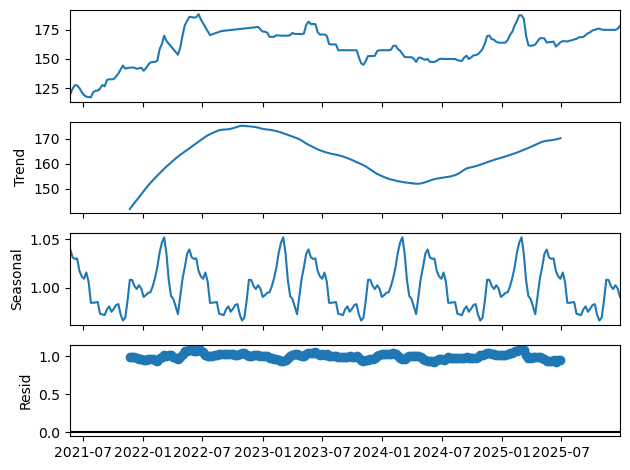

In [1073]:
with open('/Users/sazid/Documents/Daily Comm Predection Project/Fitted Model/TSA model/সয়াবিন তেল (লুজ).pkl','rb') as f:
    d=pickle.load(f)
    d.plot()

In [1084]:
with open('/Users/sazid/Documents/Daily Comm Predection Project/Fitted Model/D=1/model_weekly_চাল সরু (নাজির_মিনিকেট).pkl', 'rb') as p:
    d=pickle.load(p)
    print(d.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  241
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -265.261
Date:                Mon, 16 Feb 2026   AIC                            548.522
Time:                        16:27:40   BIC                            579.848
Sample:                    05-23-2021   HQIC                           561.144
                         - 12-28-2025                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
drift            0.0004      0.000      0.957      0.339      -0.000       0.001
Ramadan          0.2370      0.432      0.549      0.583      -0.609       1.083
flood            0.2433      0.351      0.69